<a href="https://colab.research.google.com/github/takuya-tokumoto/nlp_tutorial/blob/main/%E3%80%90%E3%82%AD%E3%82%AB%E3%82%AC%E3%82%AF%E3%80%91%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E20%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

In [ ]:
!apt install aptitude

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-l

In [ ]:
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y

git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
The following NEW packages will be installed:
  file libmagic-mgc{a} libmagic1{a} libmecab-dev libmecab2{a} mecab mecab-ipadic{a} mecab-ipadic-utf8 mecab-jumandic{a} mecab-jumandic-utf8{a} mecab-utils{a} 
The following packages will be REMOVED:
  libnvidia-common-460{u} 
0 packages upgraded, 11 newly installed, 1 to remove and 34 not upgraded.
Need to get 29.3 MB of archives. After unpacking 282 MB will be used.
Get: 1 http://archive.ubun

In [ ]:
!pip install mecab-python3==0.7

     |████████████████████████████████| 51kB 3.6MB/s 
  Created wheel for mecab-python3: filename=mecab_python3-0.7-cp37-cp37m-linux_x86_64.whl size=156587 sha256=c3224266fe20eb90c77a1bbe9cf93b4a0add18e1e9d03a40ff77dc34988c76e0
  Stored in directory: /root/.cache/pip/wheels/4c/07/3a/5f22ccc9f381f3bc01fa023202061cd1e0e9af855292f005dd
Successfully built mecab-python3


In [ ]:
import MeCab
from glob import glob

# 1.テキストファイルの書き出し

In [ ]:
txt = '''はじめまして、こちらはいまにゅチャンネルです。
Pythonを使いこなして色んなことができるように、一緒に学んでいきましょう。
本講義では特に自然言語処理について学びます。
様々なライブラリを活用することで手軽に分析ができます。
では早速進めていきましょう。'''

In [ ]:
with open('output.txt', 'x') as f:
    f.write(txt)

# 2.テキストファイルの読み込み

In [ ]:
filepaths = glob('*.txt')
filepaths

['output.txt']

In [ ]:
filepath = filepaths[0]

In [ ]:
filepath

'output.txt'

In [ ]:
with open(filepath, 'r') as f:
    txt = f.read()

In [ ]:
txt

'はじめまして、こちらはいまにゅチャンネルです。\nPythonを使いこなして色んなことができるように、一緒に学んでいきましょう。\n本講義では特に自然言語処理について学びます。\n様々なライブラリを活用することで手軽に分析ができます。\nでは早速進めていきましょう。'

# 3.形態素解析1(MeCab形式)

In [ ]:
tagger = MeCab.Tagger()
print(tagger.parse(txt))

はじめまして	感動詞,*,*,*,*,*,はじめまして,ハジメマシテ,ハジメマシテ
、	記号,読点,*,*,*,*,、,、,、
こちら	名詞,代名詞,一般,*,*,*,こちら,コチラ,コチラ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
いま	名詞,副詞可能,*,*,*,*,いま,イマ,イマ
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
ゅ	名詞,一般,*,*,*,*,*
チャンネル	名詞,一般,*,*,*,*,チャンネル,チャンネル,チャンネル
です	助動詞,*,*,*,特殊・デス,基本形,です,デス,デス
。	記号,句点,*,*,*,*,。,。,。
Python	名詞,一般,*,*,*,*,*
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
使いこなし	動詞,自立,*,*,五段・サ行,連用形,使いこなす,ツカイコナシ,ツカイコナシ
て	助詞,接続助詞,*,*,*,*,て,テ,テ
色んな	連体詞,*,*,*,*,*,色んな,イロンナ,イロンナ
こと	名詞,非自立,一般,*,*,*,こと,コト,コト
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
できる	動詞,自立,*,*,一段,基本形,できる,デキル,デキル
よう	名詞,非自立,助動詞語幹,*,*,*,よう,ヨウ,ヨー
に	助詞,副詞化,*,*,*,*,に,ニ,ニ
、	記号,読点,*,*,*,*,、,、,、
一緒	名詞,サ変接続,*,*,*,*,一緒,イッショ,イッショ
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
学ん	動詞,自立,*,*,五段・バ行,連用タ接続,学ぶ,マナン,マナン
で	助詞,接続助詞,*,*,*,*,で,デ,デ
いき	動詞,非自立,*,*,五段・カ行促音便,連用形,いく,イキ,イキ
ましょ	助動詞,*,*,*,特殊・マス,未然ウ接続,ます,マショ,マショ
う	助動詞,*,*,*,不変化型,基本形,う,ウ,ウ
。	記号,句点,*,*,*,*,。,。,。
本	接頭詞,名詞接続,*,*,*,*,本,ホン,ホン
講義	名詞,サ変接続,*,*,*,*,講義,コウギ,コーギ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
特に	副詞,一般,*,*,*,*,特に,トクニ,トクニ
自然	名詞,形容動詞語幹,*,*,*,*,自然,シゼン,シゼン
言語	名詞,一

# 4.形態素解析2(ChasSen形式)

In [ ]:
tagger = MeCab.Tagger('-Ochasen')
print(tagger.parse(txt))

はじめまして	ハジメマシテ	はじめまして	感動詞		
、	、	、	記号-読点		
こちら	コチラ	こちら	名詞-代名詞-一般		
は	ハ	は	助詞-係助詞		
いま	イマ	いま	名詞-副詞可能		
に	ニ	に	助詞-格助詞-一般		
ゅ	ゅ	ゅ	名詞-一般		
チャンネル	チャンネル	チャンネル	名詞-一般		
です	デス	です	助動詞	特殊・デス	基本形
。	。	。	記号-句点		
Python	Python	Python	名詞-一般		
を	ヲ	を	助詞-格助詞-一般		
使いこなし	ツカイコナシ	使いこなす	動詞-自立	五段・サ行	連用形
て	テ	て	助詞-接続助詞		
色んな	イロンナ	色んな	連体詞		
こと	コト	こと	名詞-非自立-一般		
が	ガ	が	助詞-格助詞-一般		
できる	デキル	できる	動詞-自立	一段	基本形
よう	ヨウ	よう	名詞-非自立-助動詞語幹		
に	ニ	に	助詞-副詞化		
、	、	、	記号-読点		
一緒	イッショ	一緒	名詞-サ変接続		
に	ニ	に	助詞-格助詞-一般		
学ん	マナン	学ぶ	動詞-自立	五段・バ行	連用タ接続
で	デ	で	助詞-接続助詞		
いき	イキ	いく	動詞-非自立	五段・カ行促音便	連用形
ましょ	マショ	ます	助動詞	特殊・マス	未然ウ接続
う	ウ	う	助動詞	不変化型	基本形
。	。	。	記号-句点		
本	ホン	本	接頭詞-名詞接続		
講義	コウギ	講義	名詞-サ変接続		
で	デ	で	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
特に	トクニ	特に	副詞-一般		
自然	シゼン	自然	名詞-形容動詞語幹		
言語	ゲンゴ	言語	名詞-一般		
処理	ショリ	処理	名詞-サ変接続		
について	ニツイテ	について	助詞-格助詞-連語		
学び	マナビ	学ぶ	動詞-自立	五段・バ行	連用形
ます	マス	ます	助動詞	特殊・マス	基本形
。	。	。	記号-句点		
様々	サマザマ	様々	名詞-形容動詞語幹		
な	ナ	だ	助動詞	特殊・ダ	体言接続
ライブラリ	ライブラリ	ライブラリ	名詞-一般		
を	ヲ	を	助詞-格助詞-一般		
活用	カツヨウ	活用	名詞-サ変接続		
する	スル	する	動詞-自立	サ変・スル	基本形
こと	コト	こと	名詞-非自立-一般		
で	デ	で	助

# 5.形態素解析3(分かち書き)

In [ ]:
tagger = MeCab.Tagger('-Owakati')
print(tagger.parse(txt))

はじめまして 、 こちら は いま に ゅ チャンネル です 。 Python を 使いこなし て 色んな こと が できる よう に 、 一緒 に 学ん で いき ましょ う 。 本 講義 で は 特に 自然 言語 処理 について 学び ます 。 様々 な ライブラリ を 活用 する こと で 手軽 に 分析 が でき ます 。 で は 早速 進め て いき ましょ う 。 



# 6.形態素解析4(カタカナ変換)

In [ ]:
tagger = MeCab.Tagger('-Oyomi')
print(tagger.parse(txt))

ハジメマシテ、コチラハイマニゅチャンネルデス。
Pythonヲツカイコナシテイロンナコトガデキルヨウニ、イッショニマナンデイキマショウ。
ホンコウギデハトクニシゼンゲンゴショリニツイテマナビマス。
サマザマナライブラリヲカツヨウスルコトデテガルニブンセキガデキマス。
デハサッソクススメテイキマショウ。



# 7.品詞毎の分類

In [ ]:
tagger = MeCab.Tagger() # Mecab形式
parsed_txt = tagger.parse(txt)
elements = parsed_txt.split('\n')[:-2] # 末尾2文字は不要なため除去
elements

['はじめまして\t感動詞,*,*,*,*,*,はじめまして,ハジメマシテ,ハジメマシテ',
 '、\t記号,読点,*,*,*,*,、,、,、',
 'こちら\t名詞,代名詞,一般,*,*,*,こちら,コチラ,コチラ',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ',
 'いま\t名詞,副詞可能,*,*,*,*,いま,イマ,イマ',
 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ',
 'ゅ\t名詞,一般,*,*,*,*,*',
 'チャンネル\t名詞,一般,*,*,*,*,チャンネル,チャンネル,チャンネル',
 'です\t助動詞,*,*,*,特殊・デス,基本形,です,デス,デス',
 '。\t記号,句点,*,*,*,*,。,。,。',
 'Python\t名詞,一般,*,*,*,*,*',
 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ',
 '使いこなし\t動詞,自立,*,*,五段・サ行,連用形,使いこなす,ツカイコナシ,ツカイコナシ',
 'て\t助詞,接続助詞,*,*,*,*,て,テ,テ',
 '色んな\t連体詞,*,*,*,*,*,色んな,イロンナ,イロンナ',
 'こと\t名詞,非自立,一般,*,*,*,こと,コト,コト',
 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ',
 'できる\t動詞,自立,*,*,一段,基本形,できる,デキル,デキル',
 'よう\t名詞,非自立,助動詞語幹,*,*,*,よう,ヨウ,ヨー',
 'に\t助詞,副詞化,*,*,*,*,に,ニ,ニ',
 '、\t記号,読点,*,*,*,*,、,、,、',
 '一緒\t名詞,サ変接続,*,*,*,*,一緒,イッショ,イッショ',
 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ',
 '学ん\t動詞,自立,*,*,五段・バ行,連用タ接続,学ぶ,マナン,マナン',
 'で\t助詞,接続助詞,*,*,*,*,で,デ,デ',
 'いき\t動詞,非自立,*,*,五段・カ行促音便,連用形,いく,イキ,イキ',
 'ましょ\t助動詞,*,*,*,特殊・マス,未然ウ接続,ます,マショ,マショ',
 'う\t助動詞,*,*,*,不変化型,基本形,う,ウ,ウ',
 '。\t記号,句点,*,*,*,*,。,。,。',
 '本\t接頭詞,名詞接続,*,*,*,*,本,ホン

In [ ]:
results = []

for element in elements:
    parts = element.split(',')
    surface_pos, pos1, base = parts[0], parts[1], parts[-3]
    surface, pos = surface_pos.split('\t')
    results.append(dict(表層形= surface, 基本形=base, 品詞= pos, 品詞1 =pos1))

In [ ]:
results

[{'品詞': '感動詞', '品詞1': '*', '基本形': 'はじめまして', '表層形': 'はじめまして'},
 {'品詞': '記号', '品詞1': '読点', '基本形': '、', '表層形': '、'},
 {'品詞': '名詞', '品詞1': '代名詞', '基本形': 'こちら', '表層形': 'こちら'},
 {'品詞': '助詞', '品詞1': '係助詞', '基本形': 'は', '表層形': 'は'},
 {'品詞': '名詞', '品詞1': '副詞可能', '基本形': 'いま', '表層形': 'いま'},
 {'品詞': '助詞', '品詞1': '格助詞', '基本形': 'に', '表層形': 'に'},
 {'品詞': '名詞', '品詞1': '一般', '基本形': '*', '表層形': 'ゅ'},
 {'品詞': '名詞', '品詞1': '一般', '基本形': 'チャンネル', '表層形': 'チャンネル'},
 {'品詞': '助動詞', '品詞1': '*', '基本形': 'です', '表層形': 'です'},
 {'品詞': '記号', '品詞1': '句点', '基本形': '。', '表層形': '。'},
 {'品詞': '名詞', '品詞1': '一般', '基本形': '*', '表層形': 'Python'},
 {'品詞': '助詞', '品詞1': '格助詞', '基本形': 'を', '表層形': 'を'},
 {'品詞': '動詞', '品詞1': '自立', '基本形': '使いこなす', '表層形': '使いこなし'},
 {'品詞': '助詞', '品詞1': '接続助詞', '基本形': 'て', '表層形': 'て'},
 {'品詞': '連体詞', '品詞1': '*', '基本形': '色んな', '表層形': '色んな'},
 {'品詞': '名詞', '品詞1': '非自立', '基本形': 'こと', '表層形': 'こと'},
 {'品詞': '助詞', '品詞1': '格助詞', '基本形': 'が', '表層形': 'が'},
 {'品詞': '動詞', '品詞1': '自立', '基本形': 'できる', '表層形': 'できる'},
 {'品詞

# 8.動詞の抽出

In [ ]:
result = results[0]
result

{'品詞': '感動詞', '品詞1': '*', '基本形': 'はじめまして', '表層形': 'はじめまして'}

In [ ]:
surface_verbs = set()
for result in results:
    if result['品詞'] == '動詞':
        surface_verbs.add(result['表層形'])

surface_verbs

{'いき', 'する', 'でき', 'できる', '使いこなし', '学び', '学ん', '進め'}

In [ ]:
surface_base = set()
for result in results:
    if result['品詞'] == '動詞':
        surface_base.add(result['基本形'])

surface_base

{'いく', 'する', 'できる', '使いこなす', '学ぶ', '進める'}

# 9.単語の出現頻度の算出

In [ ]:
from collections import defaultdict

In [ ]:
word_freq = defaultdict(int)

for result in results:
    if result['品詞'] != '記号':
        word_freq[result['基本形']] += 1 
word_freq

defaultdict(int,
            {'*': 2,
             'いく': 2,
             'いま': 1,
             'う': 2,
             'が': 2,
             'こちら': 1,
             'こと': 2,
             'する': 1,
             'だ': 2,
             'て': 2,
             'で': 3,
             'できる': 2,
             'です': 1,
             'に': 4,
             'について': 1,
             'は': 3,
             'はじめまして': 1,
             'ます': 4,
             'よう': 1,
             'を': 2,
             'チャンネル': 1,
             'ライブラリ': 1,
             '一緒': 1,
             '使いこなす': 1,
             '処理': 1,
             '分析': 1,
             '学ぶ': 2,
             '手軽': 1,
             '早速': 1,
             '本': 1,
             '様々': 1,
             '活用': 1,
             '特に': 1,
             '自然': 1,
             '色んな': 1,
             '言語': 1,
             '講義': 1,
             '進める': 1})

# 10.頻出順に並び替え

In [ ]:
! pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 3.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=7b947b3e5a5328f3011ebd6157c0a39d4799d497faa1ec893a2fa303bfab69d5
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [ ]:
%matplotlib inline

In [ ]:
word_freq

defaultdict(int,
            {'*': 2,
             'いく': 2,
             'いま': 1,
             'う': 2,
             'が': 2,
             'こちら': 1,
             'こと': 2,
             'する': 1,
             'だ': 2,
             'て': 2,
             'で': 3,
             'できる': 2,
             'です': 1,
             'に': 4,
             'について': 1,
             'は': 3,
             'はじめまして': 1,
             'ます': 4,
             'よう': 1,
             'を': 2,
             'チャンネル': 1,
             'ライブラリ': 1,
             '一緒': 1,
             '使いこなす': 1,
             '処理': 1,
             '分析': 1,
             '学ぶ': 2,
             '手軽': 1,
             '早速': 1,
             '本': 1,
             '様々': 1,
             '活用': 1,
             '特に': 1,
             '自然': 1,
             '色んな': 1,
             '言語': 1,
             '講義': 1,
             '進める': 1})

In [ ]:
word_freq.items()

dict_items([('はじめまして', 1), ('こちら', 1), ('は', 3), ('いま', 1), ('に', 4), ('*', 2), ('チャンネル', 1), ('です', 1), ('を', 2), ('使いこなす', 1), ('て', 2), ('色んな', 1), ('こと', 2), ('が', 2), ('できる', 2), ('よう', 1), ('一緒', 1), ('学ぶ', 2), ('で', 3), ('いく', 2), ('ます', 4), ('う', 2), ('本', 1), ('講義', 1), ('特に', 1), ('自然', 1), ('言語', 1), ('処理', 1), ('について', 1), ('様々', 1), ('だ', 2), ('ライブラリ', 1), ('活用', 1), ('する', 1), ('手軽', 1), ('分析', 1), ('早速', 1), ('進める', 1)])

In [ ]:
sorted_work_freq = sorted(word_freq.items(), key = lambda x:x[1], reverse=True)
sorted_work_freq

[('に', 4),
 ('ます', 4),
 ('は', 3),
 ('で', 3),
 ('*', 2),
 ('を', 2),
 ('て', 2),
 ('こと', 2),
 ('が', 2),
 ('できる', 2),
 ('学ぶ', 2),
 ('いく', 2),
 ('う', 2),
 ('だ', 2),
 ('はじめまして', 1),
 ('こちら', 1),
 ('いま', 1),
 ('チャンネル', 1),
 ('です', 1),
 ('使いこなす', 1),
 ('色んな', 1),
 ('よう', 1),
 ('一緒', 1),
 ('本', 1),
 ('講義', 1),
 ('特に', 1),
 ('自然', 1),
 ('言語', 1),
 ('処理', 1),
 ('について', 1),
 ('様々', 1),
 ('ライブラリ', 1),
 ('活用', 1),
 ('する', 1),
 ('手軽', 1),
 ('分析', 1),
 ('早速', 1),
 ('進める', 1)]

In [ ]:
sorted_work_freq[:10]

[('に', 4),
 ('ます', 4),
 ('は', 3),
 ('で', 3),
 ('*', 2),
 ('を', 2),
 ('て', 2),
 ('こと', 2),
 ('が', 2),
 ('できる', 2)]

In [ ]:
# 内包表記
keys = [_[0] for _ in sorted_work_freq[:10]]
values = [_[1] for _ in sorted_work_freq[:10]]

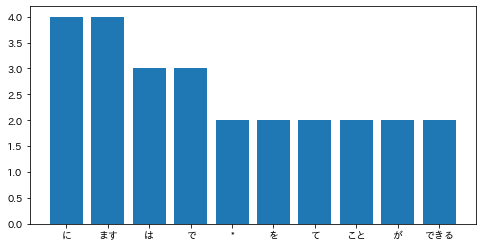

In [ ]:
plt.figure(figsize = (8,4))
plt.bar(keys, values)
plt.show()

# 11.ヒストグラムで可視化

In [ ]:
values = word_freq.values()

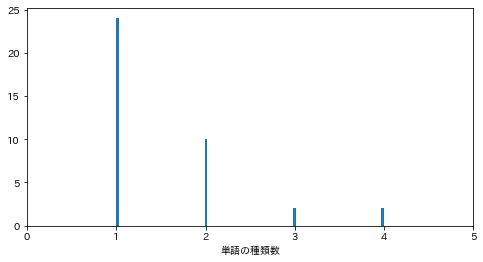

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(values, bins = 100)
plt.xlabel('出現回数')
plt.xlabel('単語の種類数')
plt.xlim(0, 5)
plt.show()

# 12.N-gram(文字単位)

In [ ]:
txt = '今日は晴れです。'

In [ ]:
# i = 0
for i in range(len(txt)-1):
    print(txt[i:i+2])

今日
日は
は晴
晴れ
れで
です
す。


In [ ]:
txt[0:0+2]

'今日'

In [ ]:
txt[1:1+2]

'日は'

# 13.N-gram(単語単位)

In [ ]:
txt = 'Pythonを一緒に学びましょう。'

In [ ]:
tagger = MeCab.Tagger('-Owakati')
tagger.parse(txt)

'Python を 一緒 に 学び ましょ う 。 \n'

In [ ]:
words = tagger.parse(txt).split(' ')[:-1]
words

['Python', 'を', '一緒', 'に', '学び', 'ましょ', 'う', '。']

In [ ]:
# tri-gram
for i in range(len(words)-1):
    print("".join(words[i:i+3]))

Pythonを一緒
を一緒に
一緒に学び
に学びましょ
学びましょう
ましょう。
う。


# 14.N-gramの関数化

In [ ]:
def ngram(text, n):
    return [text[i:i+n] for i in range(len(text)-n-1)]

In [ ]:
txt = 'Pythonを一緒に学びましょう。'
words = tagger.parse(txt).split(' ')[:-1]

In [ ]:
words

['Python', 'を', '一緒', 'に', '学び', 'ましょ', 'う', '。']

- 文字単位

In [ ]:
ngram(txt, 4)

['Pyth',
 'ytho',
 'thon',
 'honを',
 'onを一',
 'nを一緒',
 'を一緒に',
 '一緒に学',
 '緒に学び',
 'に学びま',
 '学びまし',
 'びましょ']

- 単語単位

In [ ]:
ngram(words, 4)

[['Python', 'を', '一緒', 'に'], ['を', '一緒', 'に', '学び'], ['一緒', 'に', '学び', 'ましょ']]

# 15.単語ベクトルの読み込み

In [ ]:
! pip install gensim

In [ ]:
# Google newsデータセットの学習モデルを読み込み
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

--2021-05-23 07:31:36--  https://docs.google.com/uc?export=download&confirm=&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving docs.google.com (docs.google.com)... 108.177.11.102, 108.177.11.100, 108.177.11.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.11.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors-     [ <=>                ]   3.05K  --.-KB/s    in 0s      

2021-05-23 07:31:37 (51.1 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [3122]



In [ ]:
from gensim.models import KeyedVectors

In [ ]:
model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz', binary=True)

OSError: ignored

In [ ]:
model['Japan'][:50]

NameError: ignored

# 16.Cos類似度

In [ ]:
model.similarity('Japan', 'Japanese')

0.7505485

In [ ]:
model.similarity('Japan', 'Italian')

0.1946641

# 17.類似度ランキング

In [ ]:
ranks = model.most_similar('Japan', topn=10)
ranks

[('Japanese', 0.7505485415458679),
 ('Japans', 0.7475504875183105),
 ('South_Korea', 0.7070896625518799),
 ('Tokyo', 0.7002254724502563),
 ('Korea', 0.6590374708175659),
 ('Japanâ_€_™', 0.6171501874923706),
 ('Kurara_Chibana', 0.6147364377975464),
 ('Shizuoka', 0.6136741638183594),
 ('holder_Ryosuke_Irie', 0.6119263172149658),
 ('Sachiko_Ito', 0.6117385625839233)]

# 18.単語ベクトルの演算

In [ ]:
# model['King'] - model['male'] +model['female']

In [ ]:
model.most_similar(positive=['King', 'female'], negative =[ 'male'], topn=10)

[('Queen', 0.522716760635376),
 ('Oprah_BFF_Gayle', 0.4517025053501129),
 ('NECN_Alison', 0.4510015845298767),
 ('Geoffrey_Rush_Exit', 0.4495682120323181),
 ('Tupou_V.', 0.44818902015686035),
 ('Greene', 0.4478954076766968),
 ('gal_pal_Gayle', 0.4388653635978699),
 ('prosecutor_Dan_Satterberg', 0.43857455253601074),
 ('Jackson', 0.43747198581695557),
 ('Thailand_Bhumibol_Adulyadej', 0.43224847316741943)]

In [ ]:
del ranks

# 19.k-meansでクラスタリング

In [ ]:
max_vocab = 1000
vocab = list(model.wv.vocab.keys())[:max_vocab]
vectors = [model.wv[word] for word in vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.cluster import KMeans

n_clusters = 100
kmeans_model = KMeans(n_clusters=n_clusters, verbose=1, random_state=42, n_jobs=-1)
kmeans_model.fit(vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=1)

In [ ]:
cluster_labels = kmeans_model.labels_
cluster_to_words = defaultdict(list)
for cluster_id, word in zip(cluster_labels, vocab):
    cluster_to_words[cluster_id].append(word)

In [ ]:
for words in cluster_to_words.values():
  print(words[:10])

In [ ]:
cluster_to_words

NameError: ignored

# 20.t-SNEで可視化

In [ ]:
! pip install bhtsne

In [ ]:
import bhtsne
import numpy as np

In [ ]:
embedded = bhtsne.tsne(np.array(vectors).astype(np.float64), dimensions=2, rand_seed=123)

In [ ]:
plt.figure(figsize=(20, 20))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, vocab):
    plt.annotate(name, (x, y))
plt.show()

In [ ]:
embedded.shape

In [ ]:
embedded.T.shape

In [ ]:
embedded.T[1]